# Detect Time Series Anomalies Exercises

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

In [1]:
import sys

In [2]:
sys.path.append('/Users/nickolaspedrimiranda/CodeUp/functions')

In [24]:
import acquire as ac

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
query = 'SELECT * FROM logs'

log = ac.sql_query('curriculum_logs', query)

In [36]:
log.head()

,path,user_id,cohort_id,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [12]:
log['datetime'] = log.date + ' ' +  log.time

In [17]:
log.datetime = pd.to_datetime(log.datetime)

In [20]:
log = log.set_index('datetime')

In [25]:
log = log.drop(columns=['date','time'])

In [52]:
day_count = log.ip.resample('d').count()

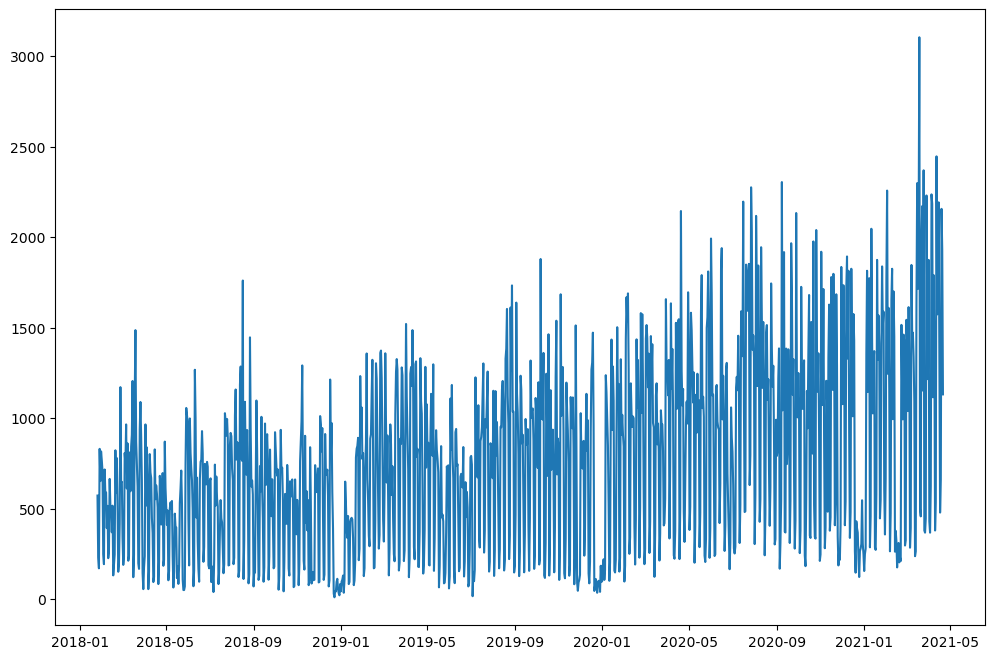

In [53]:
plt.figure(figsize=(12,8))
plt.plot(day_count)
plt.show()

In [58]:
ema_7 = day_count.ewm(span=7).mean()
ema_14 = day_count.ewm(span=14).mean()

In [61]:
dev = ema_14.std()

In [67]:
ub = ema_14 + (dev * 3)
lb = ema_14 - (dev * 3)

In [ ]:
day_count.resample(14)

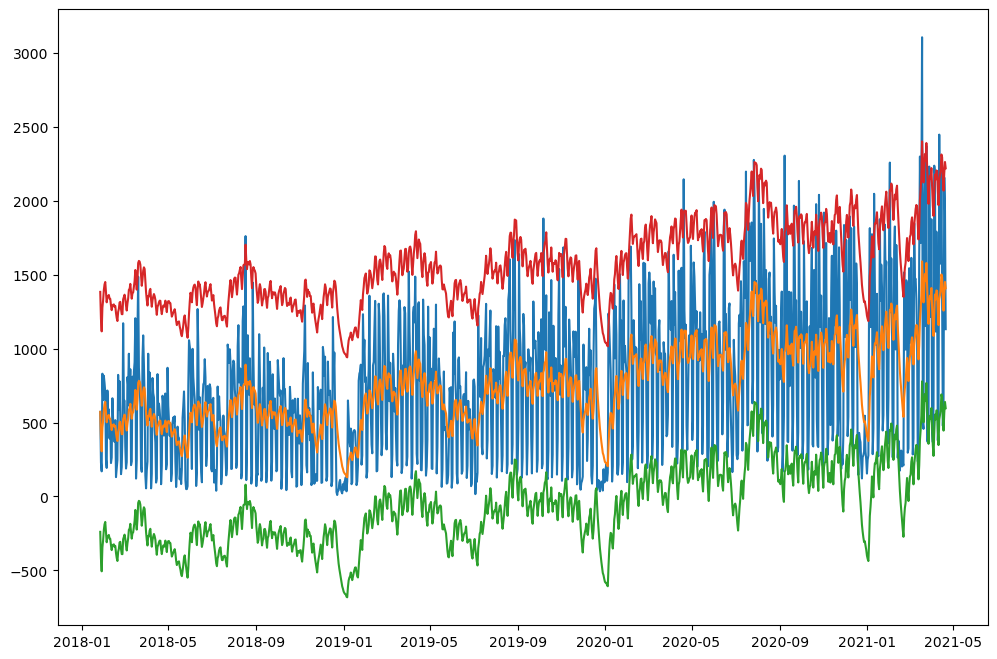

In [68]:
plt.figure(figsize=(12,8))
plt.plot(day_count)
plt.plot(ema_14)
plt.plot(lb)
plt.plot(ub)
plt.show()